<a href="https://colab.research.google.com/github/gauravry/DS_Portfolio/blob/main/Logistic_Regression_Our_Own_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

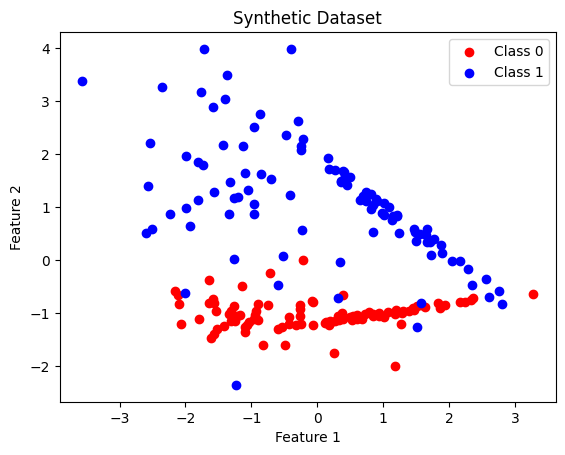

In [11]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate the dataset
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=50)

# Visualize the data
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red', label='Class 0')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Dataset')
plt.legend()
plt.show()

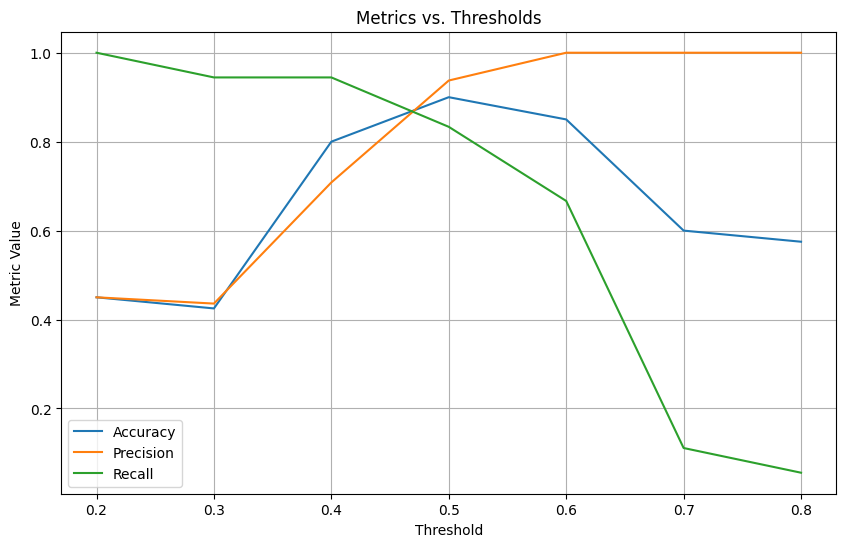


Threshold: 0.2
Confusion Matrix:
[[ 0 22]
 [ 0 18]]

Threshold: 0.3
Confusion Matrix:
[[ 0 22]
 [ 1 17]]

Threshold: 0.4
Confusion Matrix:
[[15  7]
 [ 1 17]]

Threshold: 0.5
Confusion Matrix:
[[21  1]
 [ 3 15]]

Threshold: 0.6
Confusion Matrix:
[[22  0]
 [ 6 12]]

Threshold: 0.7
Confusion Matrix:
[[22  0]
 [16  2]]

Threshold: 0.8
Confusion Matrix:
[[22  0]
 [17  1]]


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import confusion_matrix, precision_score, recall_score

class Our_OWN_LogisticRegression:

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr  # Learning rate
        self.n_iters = n_iters  # Number of iterations
        self.weights = None  # Weights will be initialized during fitting
        self.bias = None  # Bias will be initialized during fitting

    def fit(self, X, y):
        # Number of samples and features
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.n_iters):
            # Linear model
            linear_model = np.dot(X, self.weights) + self.bias
            # Sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X, cutoff=0.5):
        # Linear model
        linear_model = np.dot(X, self.weights) + self.bias
        # Sigmoid function
        y_predicted = self._sigmoid(linear_model)
        # Convert probabilities to binary output using cutoff threshold
        y_predicted_cls = [1 if i > cutoff else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def predict_proba(self, X):
        # Linear model
        linear_model = np.dot(X, self.weights) + self.bias
        # Sigmoid function
        y_predicted = self._sigmoid(linear_model)
        return y_predicted

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

def calculate_metrics_for_thresholds(model, X_test, y_test, thresholds):
    accuracies = []
    precisions = []
    recalls = []
    confusion_matrices = []  # Store confusion matrices

    for threshold in thresholds:
        predictions = model.predict(X_test, cutoff=threshold)

        # Calculate metrics
        cm = confusion_matrix(y_test, predictions)
        accuracy = np.mean(predictions == y_test)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)

        # Append metrics to lists
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        confusion_matrices.append(cm)

    return accuracies, precisions, recalls, confusion_matrices

# Example usage:
if __name__ == "__main__":
    # Generate some example data
    X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=50)

    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

    # Instantiate the model
    model = Our_OWN_LogisticRegression(lr=0.001, n_iters=1000)

    # Train the model
    model.fit(X_train, y_train)

    # Thresholds to evaluate
    thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

    # Calculate metrics for various thresholds
    accuracies, precisions, recalls, confusion_matrices = calculate_metrics_for_thresholds(model, X_test, y_test, thresholds)

    # Plot the metrics
    plt.figure(figsize=(10, 6))

    plt.plot(thresholds, accuracies, label='Accuracy')
    plt.plot(thresholds, precisions, label='Precision')
    plt.plot(thresholds, recalls, label='Recall')

    plt.title('Metrics vs. Thresholds')
    plt.xlabel('Threshold')
    plt.ylabel('Metric Value')
    plt.legend()
    plt.grid(True)
    plt.xticks(thresholds)

    plt.show()

    # Print confusion matrices for all thresholds
    for i, threshold in enumerate(thresholds):
        print(f"\nThreshold: {threshold}")
        print("Confusion Matrix:")
        print(confusion_matrices[i])